Batch download Mapillary images within an area of interest (AOI)
------



### Mapillary access token

Place your Mapillary access token below. You can sign up for a token for free at https://www.mapillary.com/dashboard/developers (click on the Register application button and fill in your information). The token is private and should never be shared.

In [14]:
# DO NOT SHARE YOUR TOKEN!!
mapillary_access_token = 'YOUR_MAPILLARY_TOKEN'

### Import some necessary libraries 

In [13]:
from mapillary_utils import *

from tqdm import tqdm
import json

from shapely.geometry import shape

### Define and load the AOI

Before running this script, you need to have a GeoJSON file defining your AOI. The file must contain one single polygon. You can use QGIS or any tool of your choice to create the AOI. The script below parses the AOI file.

In [3]:
# load GeoJSON file that defines the aoi
with open('../data/misc/aoi-small.geojson') as f:
    js = json.load(f)

# assume the AOI is the first/only polygon in the GeoJSON file
aoi = shape(js['features'][0]['geometry'])
print(aoi)

MULTIPOLYGON (((-6.25091796580725 53.34141409290599, -6.252426118410063 53.33970786741575, -6.247567141154641 53.33802168582756, -6.245960213486576 53.339686360044304, -6.25091796580725 53.34141409290599)))


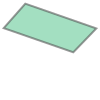

In [4]:
# quick view
aoi

### Fetch image information

We search for images inside the AOI and fetch the image metadata but do not download the images just yet.

In [9]:
features = fetch_image_info_by_aoi(aoi, mapillary_access_token)

print('number of images in the AOI: {}'.format(len(features['features'])))

tile 1/1


100%|████████████████████████████████████████| 14293/14293 [00:00<00:00, 89945.32it/s]

number of images in the aoi: 482


Look at the metadata we retrieve

In [10]:
features

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Point',
    'coordinates': [-6.251837611198425, 53.33959867802665]},
   'properties': {'captured_at': 1603005044153,
    'compass_angle': 130.63613891602,
    'id': 909277946313136,
    'is_pano': False,
    'organization_id': 2971781939745297,
    'sequence_id': '0ngvzh9n65t59u9waknfcv'}},
  {'type': 'Feature',
   'geometry': {'type': 'Point',
    'coordinates': [-6.248908638954163, 53.34054033133401]},
   'properties': {'captured_at': 1429544742311,
    'compass_angle': 117.05056148947,
    'id': 453485172418647,
    'is_pano': False,
    'sequence_id': 'HqWvEGCNhtCcxQqxUuzp-Q'}},
  {'type': 'Feature',
   'geometry': {'type': 'Point',
    'coordinates': [-6.2462639808654785, 53.339585866273666]},
   'properties': {'captured_at': 1493484282000,
    'compass_angle': 72.590644836426,
    'id': 551810066223675,
    'is_pano': False,
    'sequence_id': 'QAvee7GuDbOI3P2bvn9nkg'}},
  {'type': 'Feature',

### Download the images

Time to download the images

In [12]:
# output directory
odir = '../data/tmp'

# download the images
for feature in tqdm(features['features']):
    img_id = feature['properties']['id']
    seq_id = feature['properties']['sequence_id']
    
    if not os.path.exists(os.path.join(odir, seq_id)):
        os.makedirs(os.path.join(odir, seq_id))
    
    download_image(odir, seq_id, img_id, mapillary_access_token)

100%|███████████████████████████████████████████████| 482/482 [14:36<00:00,  1.82s/it]


The images should be ready in the output directory when you reach this!